# **I. Датасет**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mnist.py to mnist.py


In [ ]:
from mnist import load_mnist
import matplotlib.pyplot as plt

In [ ]:
from mnist import load_mnist
train, validation, test = load_mnist()

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [ ]:
X_train, y_train = train
X_val, y_val = validation
X_test, y_test = test

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(55000, 28, 28, 1) (55000,)
(5000, 28, 28, 1) (5000,)
(10000, 28, 28, 1) (10000,)


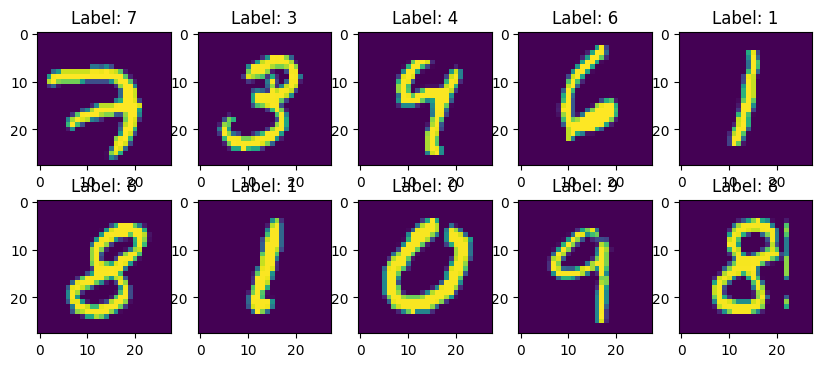

In [ ]:
plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28))
    plt.title(f"Label: {y_train[i]}")

plt.show()

# **II. Алгоритм PCA**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
class my_PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean = None
        self.components = None
        self.explained_variance = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_c = X - self.mean

        U, S, Vt = np.linalg.svd(X_c, full_matrices=False)

        self.components = Vt[:self.n_components]
        n_samples = X.shape[0]
        self.explained_variance = (S ** 2) / (n_samples - 1)
    def transform(self, X):
        X_c = X - self.mean
        return np.dot(X_c, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

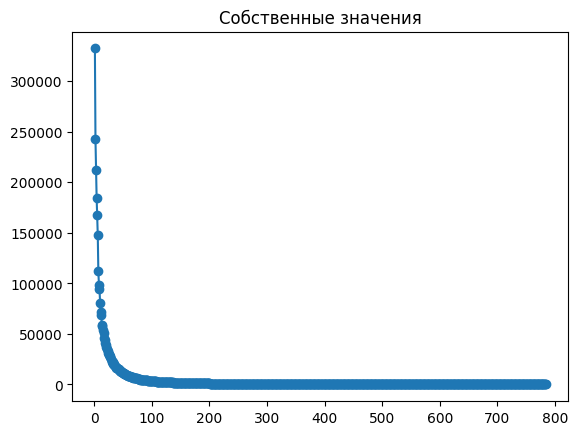

In [ ]:
X = X_train.reshape(X_train.shape[0], -1)
pca = my_PCA(n_components=50)
X_transformed = pca.fit_transform(X)
eigenvalues = pca.explained_variance
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o")
plt.title("Собственные значения")
plt.show()

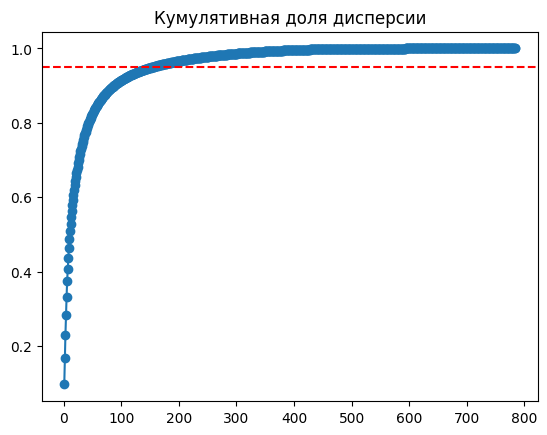

In [ ]:
cumulative = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(cumulative) + 1), cumulative, marker="o")
plt.title("Кумулятивная доля дисперсии")
plt.axhline(y=0.95, color="r", linestyle="--")
plt.show()

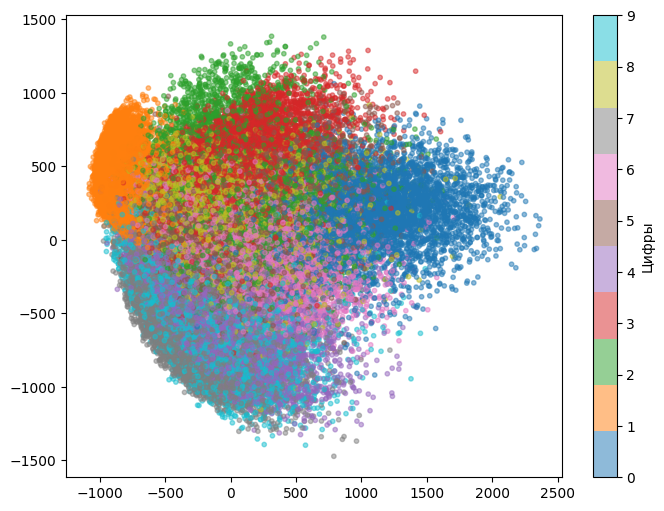

In [ ]:
pca_2d = my_PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                      c=y_train, cmap="tab10", alpha=0.5, s=10)
plt.colorbar(scatter, ticks=range(10), label="Цифры")
plt.show()

# **III. Алгоритм kNN**

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
class my_kNN:
    def __init__(self, n_neighbors=7):
        self.n_neighbors = n_neighbors

    def fit(self, X_train, y_train):
        self.X_train, self.y_train = X_train, y_train

    def predict(self, X):
        y_pred = []
        for x in X:
          distances = np.linalg.norm(self.X_train - x, axis=1)
          k_indices = np.argsort(distances)[:self.n_neighbors]
          k_nearest_labels = self.y_train[k_indices]
          most_common = Counter(k_nearest_labels).most_common(1)[0][0]
          y_pred.append(most_common)

        return np.array(y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new, X_test, y_train_new, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score



In [ ]:
# создаём классификатор с 5 соседями
knn = my_kNN(n_neighbors=5)

# "обучаем" (fit просто сохраняет данные)
knn.fit(X_train_new, y_train_new)


In [ ]:
print("X_test shape:", X_test.shape)      # должно быть (n_samples, 784)
print("y_test shape:", y_test.shape)      # должно быть (n_samples,)
print("X_train_new shape:", X_train_new.shape)
print("y_train_new shape:", y_train_new.shape)


X_test shape: (11000, 784)
y_test shape: (11000,)
X_train_new shape: (44000, 784)
y_train_new shape: (44000,)


In [ ]:
X_test_small = X_test[:1000]    # первые 1000 образцов
y_test_small = y_test[:1000]



In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность алгоритма kNN:", accuracy)
print("В процентах:", accuracy*100, "%")

Точность алгоритма kNN: 0.4059090909090909
В процентах: 40.590909090909086 %
